In [23]:

# Load libraries# Load l 
import pandas as pd
from itertools import groupby
from __future__ import division
import operator
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm
% matplotlib inline
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
import seaborn as sns
import math


In [3]:
data = pd.read_csv("/Users/vikaschhillar/Downloads/india-districts-census-2011.csv")


In [4]:
data.shape


(640, 118)

In [5]:
data.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [6]:
data.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


In [9]:
print(data.groupby('State name').size())

State name
ANDAMAN AND NICOBAR ISLANDS     3
ANDHRA PRADESH                 23
ARUNACHAL PRADESH              16
ASSAM                          27
BIHAR                          38
CHANDIGARH                      1
CHHATTISGARH                   18
DADRA AND NAGAR HAVELI          1
DAMAN AND DIU                   2
GOA                             2
GUJARAT                        26
HARYANA                        21
HIMACHAL PRADESH               12
JAMMU AND KASHMIR              22
JHARKHAND                      24
KARNATAKA                      30
KERALA                         14
LAKSHADWEEP                     1
MADHYA PRADESH                 50
MAHARASHTRA                    35
MANIPUR                         9
MEGHALAYA                       7
MIZORAM                         8
NAGALAND                       11
NCT OF DELHI                    9
ORISSA                         30
PONDICHERRY                     4
PUNJAB                         20
RAJASTHAN                      33
SIK

In [21]:
# Group the data state-wise
states_group = data.groupby(by = "State name")
# List for storing tuples which contain state-name and its corresponding literacy rate
literacy_rate = []

# Iterate through each group (a group has rows with the same state-name throughout the group)
# Here, key contains 'State name' and group contains all the corresponding rows
for key , group in states_group:
    # Total population and total literate population across the state
    total_state_pop = 0
    total_literate_pop = 0
    # Iterate through all the rows of the group to get total state population and total literate state population
    for row in group.iterrows():
        total_state_pop += row[1][3] # 3 is the index of column 'Population'
        total_literate_pop += row[1][6] # 6 is the index of column 'Literate'
    
    # Calculate literacy rate for the state
    rate = (total_literate_pop/total_state_pop)*100
    # Store the result as a tuple in the list literacy_rate, contaning pairs of state names and literacy rates
    literacy_rate.append((key,rate))
    
print ("Statewise literacy rates : \n")
print (literacy_rate)


Statewise literacy rates : 

[('ANDAMAN AND NICOBAR ISLANDS', 77.32414387475991), ('ANDHRA PRADESH', 59.77334542575791), ('ARUNACHAL PRADESH', 55.35810170647822), ('ASSAM', 61.45689155040753), ('BIHAR', 50.43691584466746), ('CHANDIGARH', 76.31228385996495), ('CHHATTISGARH', 60.20670499402666), ('DADRA AND NAGAR HAVELI', 64.94738281511395), ('DAMAN AND DIU', 77.45460375667531), ('GOA', 79.9075105670377), ('GUJARAT', 67.99068069374013), ('HARYANA', 65.47546646422207), ('HIMACHAL PRADESH', 73.41628837330991), ('JAMMU AND KASHMIR', 56.351669069128555), ('JHARKHAND', 55.55958090869887), ('KARNATAKA', 66.5310162908284), ('KERALA', 84.2237101824127), ('LAKSHADWEEP', 81.51164053169543), ('MADHYA PRADESH', 59.00186114469107), ('MAHARASHTRA', 72.5737700262924), ('MANIPUR', 66.8282095977511), ('MEGHALAYA', 60.16419893025995), ('MIZORAM', 77.30316822912015), ('NAGALAND', 67.85103072930934), ('NCT OF DELHI', 75.87450420513153), ('ORISSA', 63.71195527692738), ('PONDICHERRY', 76.71034085418282), ('PU

/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

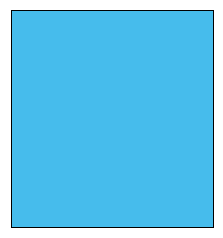

In [31]:

# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()